# CONTENT RECOMMENDATION
eg: Netflix, Youtube because they are recommending videos based on our wishlist or previous content we have watched

In [1]:
import pandas as pd
import numpy as np

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep = '\t', names = column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [3]:
movie = pd.read_csv("Movie_Id_Titles")
movie.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
df = pd.merge(df, movie, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,1970-01-01 00:00:00.881250949,Star Wars (1977)
1,290,50,5,1970-01-01 00:00:00.880473582,Star Wars (1977)
2,79,50,4,1970-01-01 00:00:00.891271545,Star Wars (1977)
3,2,50,5,1970-01-01 00:00:00.888552084,Star Wars (1977)
4,8,50,5,1970-01-01 00:00:00.879362124,Star Wars (1977)


In [6]:
df.rename(columns = {'timestamp':'Date'}, inplace = True)
df.head()

,user_id,item_id,rating,Date,title
0,0,50,5,1970-01-01 00:00:00.881250949,Star Wars (1977)
1,290,50,5,1970-01-01 00:00:00.880473582,Star Wars (1977)
2,79,50,4,1970-01-01 00:00:00.891271545,Star Wars (1977)
3,2,50,5,1970-01-01 00:00:00.888552084,Star Wars (1977)
4,8,50,5,1970-01-01 00:00:00.879362124,Star Wars (1977)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [9]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [10]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [11]:
ratings['ratings_count'] = df.groupby('title')['rating'].count()
ratings.head()

,rating,ratings_count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


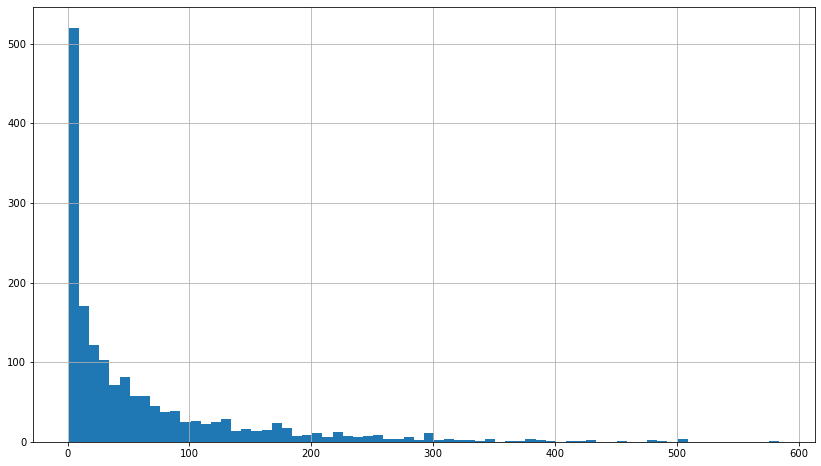

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 14,8

ratings['ratings_count'].hist(bins=70)

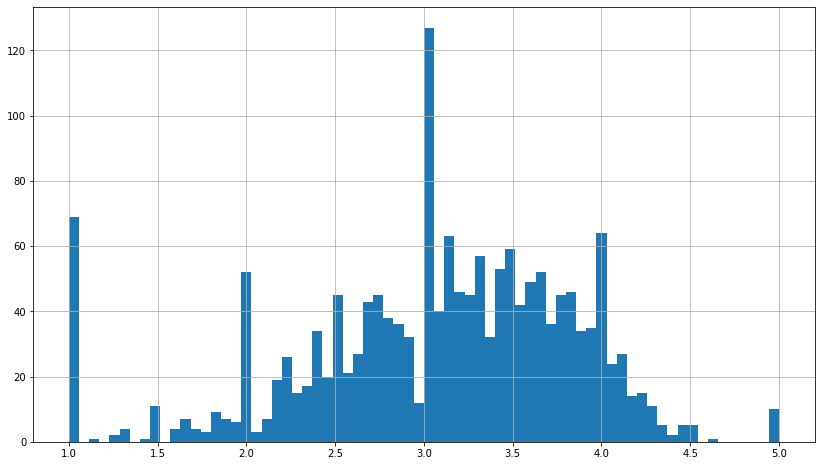

In [13]:
ratings['rating'].hist(bins=70)

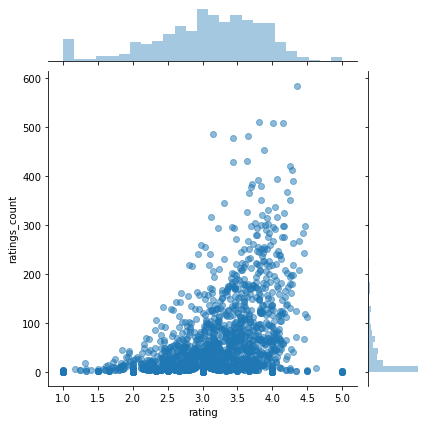

In [14]:
sns.jointplot(x = 'rating', y = 'ratings_count', data = ratings, alpha = 0.5)

In [15]:
movies = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
movies.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
ratings.sort_values('ratings_count', ascending=False).head(10)

,rating,ratings_count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [17]:
starwars_users_ratings = movies['Star Wars (1977)']
starwars_users_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [18]:
starwars_suggestion_movies = movies.corrwith(starwars_users_ratings)
starwars_suggested_movies = pd.DataFrame(starwars_suggestion_movies, columns = ['Correlation'])
starwars_suggested_movies.head()

c:\python\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\python\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [19]:
starwars_suggested_movies.sort_values('Correlation', ascending = False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0


In [20]:
starwars_suggested_movies['Number of ratings'] = ratings['ratings_count']
starwars_suggested_movies.head()

,Correlation,Number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [21]:
final_report = starwars_suggested_movies[starwars_suggested_movies['Number of ratings']>100].sort_values('Correlation', ascending = False)

In [22]:
final_report.head(10)

,Correlation,Number of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


# Colloborative Recommendation
eg.Amazon Because in amazon if you brought a new phone then the amazon recommends headset or cover or something related  to it

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

books = pd.read_csv('books.csv',sep = ';',usecols =['ISBN', 'Book-Title'], error_bad_lines = False, encoding = 'latin1')
books.head()

,ISBN,Book-Title
0,0195153448,Classical Mythology
1,0002005018,Clara Callan
2,0060973129,Decision in Normandy
3,0374157065,Flu: The Story of the Great Influenza Pandemic...
4,0393045218,The Mummies of Urumchi


In [4]:
ratings  = pd.read_csv('ratings.csv', sep = ';', error_bad_lines = False, encoding = 'latin1')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users = pd.read_csv('users.csv', sep = ';', error_bad_lines = False, encoding = 'latin1')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
counts1 = ratings['User-ID'].value_counts()
ratings = ratings[ratings['User-ID'].isin(counts1[counts1>=200].index)]
counts = ratings['Book-Rating'].value_counts()
ratings = ratings[ratings['Book-Rating'].isin(counts[counts>=100].index)]

In [9]:
combine_book_rating = pd.merge(ratings, books, on = 'ISBN')
combine_book_rating.dropna(axis = 0, subset = ['Book-Title'])
combine_book_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


In [19]:
total_count = (combine_book_rating.groupby('Book-Title')['Book-Rating'].count().reset_index().rename(columns = {'Book-Rating':'TotalCount'}))
total_count.head()

,Book-Title,TotalCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [20]:
ratings_with_count = combine_book_rating.merge(total_count, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
ratings_with_count.head()

,User-ID,ISBN,Book-Rating,Book-Title,TotalCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [21]:
popularity_threshold = 50
popular_books = ratings_with_count.query(" TotalCount >= @popularity_threshold ")
popular_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,TotalCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


sELECT THE USER ONLY FROM usa/canada

In [39]:
users_with_books = popular_books.merge(users, left_on = 'User-ID', right_on = 'User-ID', how = 'right')
users_with_books.drop('Age', axis = 1, inplace = True)
users_with_books.head()

combined = users_with_books[users_with_books['Location'].str.contains("usa|canada")]
combined.head()

,User-ID,ISBN,Book-Rating,Book-Title,TotalCount,Location
0,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,82.0,"gilbert, arizona, usa"
1,277427,0060930535,0.0,The Poisonwood Bible: A Novel,133.0,"gilbert, arizona, usa"
2,277427,0060934417,0.0,Bel Canto: A Novel,108.0,"gilbert, arizona, usa"
3,277427,0061009059,9.0,One for the Money (Stephanie Plum Novels (Pape...,108.0,"gilbert, arizona, usa"
4,277427,006440188X,0.0,The Secret Garden,79.0,"gilbert, arizona, usa"


# KNN

In [40]:
from scipy.sparse import csr_matrix

In [43]:
pivot_table = combined.pivot_table(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating').fillna(0)
pivot_table.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,271448,271705,273979,274061,274308,274808,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0


In [61]:
combined_matrix = csr_matrix(pivot_table.values)
combined_matrix

<746x734 sparse matrix of type '<class 'numpy.float64'>'
	with 13248 stored elements in Compressed Sparse Row format>

In [62]:
query_index = np.random.choice(pivot_table.shape[0])
print(query_index)

24


In [63]:
pivot_table.iloc[query_index,:].values.reshape(1,-1)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.

In [67]:
from sklearn.neighbors import NearestNeighbors

In [68]:
model_knn = NearestNeighbors(algorithm = 'brute', metric = 'cosine')

In [69]:
model_knn.fit(combined_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [70]:
distances, indices = model_knn.kneighbors(pivot_table.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [71]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(pivot_table.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i,pivot_table.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for A Thousand Acres (Ballantine Reader's Circle):

1: Charming Billy, with distance of 0.6396573048367671:
2: A Man in Full, with distance of 0.6696517207807151:
3: The Hours : A Novel, with distance of 0.6709204554764361:
4: The Bonfire of the Vanities, with distance of 0.6781889285388194:
5: A Civil Action, with distance of 0.7081907861584664:
